# Compute exponential growth from CST
This script showcases how the exponential growth factor from a bunch of CST simulations can be calculated.

## Pre-requisites
Import some objects:

In [1]:
from pathlib import Path

import numpy as np

from simultipac.simulation_results.simulations_results import (
    SimulationsResults,
    SimulationsResultsFactory,
)

[INFO    ] [log_manager.py      ] Starting log for Simultipac - Version: 2.0.1.dev22+g1f37471.d20250203, Commit: 93f0bda7f016d554825f3c97148c833b46dd0da1


## Loading the data
The factory is used to create the SimulationsResults objects. You will need to provide the RF frequency in GHz.

In [2]:
factory = SimulationsResultsFactory("CST", freq_ghz=1.30145)

The SimulationsResults object will hold all the data. You must provide:
1. The path to the folder holding the results. Check [dedicated documentation](https://simultipac.readthedocs.io/en/latest/simultipac/simultipac.cst.simulation_results.html#simultipac.cst.simulation_results.CSTResultsFactory.from_simulation_folders) for the format of the results folder.

In [3]:
results: SimulationsResults = factory.create(
    master_folder=Path("../../../examples/cst/Export_Parametric"),
)

You can visualize the evolution of the population with the SimulationsResults.plot method.
Here, we only plot the first, 6th and 91th simulations.

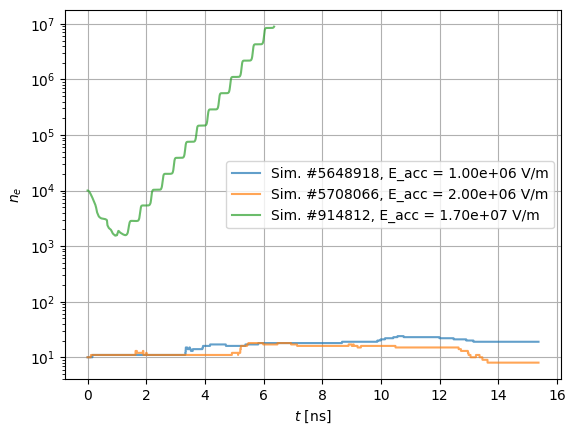

In [4]:
idx_to_plot = (0, 5, 90)
pop_axes = results.plot(x="time", y="population", idx_to_plot=idx_to_plot, alpha=0.7)
pop_axes.set_yscale("log")

## Calculating exponential growth factor
The running mean keyword allows to average the evolution of the population over a RF period. It is recommended with CST, as there are many points per RF period.

In [5]:
results.fit_alpha(fitting_periods=5, minimum_final_number_of_electrons=5, running_mean=True)

The modelled population can be plotted with:

In [6]:
pop_axes = results.plot(
    x="time",
    y="modelled_population",
    idx_to_plot=idx_to_plot,
    axes=pop_axes,
    lw=3,
    ls="--",
)

You can also plot the evolution of the exponential growth factor.
Note that there parametric plot are supported; the keys in `sort_by_parameter` arguments must be present in the `mmdd_xxxxxxx/Parameters.txt` files.

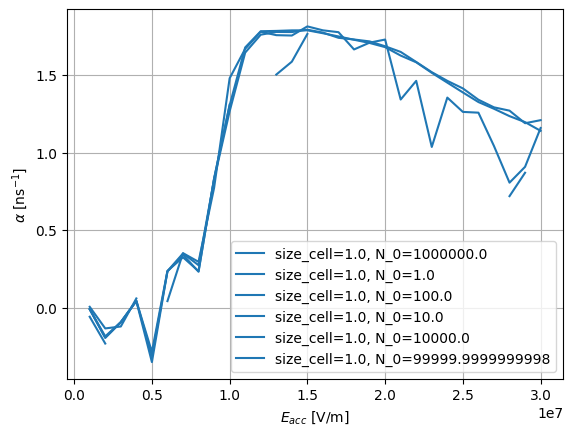

In [7]:
alpha_axes = results.plot(x="e_acc", y="alpha", sort_by_parameter=("size_cell","N_0"))